In [39]:
#导入库
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,r2_score

In [40]:
#导入数据
dataset = pd.read_csv('training_MX2.csv')
x=dataset.iloc[:,1:12]
y=dataset.iloc[:,12]
print(x)
print(y)

      Volume     Mass  Energy  Heat_of_formation  Electronegativity_A  \
0    144.363  116.116 -19.583             -0.673                 1.66   
1    161.958  209.938 -17.832             -0.486                 1.66   
2    192.019  307.196 -16.136             -0.106                 1.66   
3    155.424  210.488 -27.664             -3.303                 1.32   
4    146.349  210.488 -25.997             -2.748                 1.32   
5    206.673  242.610 -20.439             -1.592                 1.32   
6    223.633  336.432 -18.519             -1.349                 1.32   
7    214.984  336.432 -17.998             -1.175                 1.32   
8    247.391  433.690 -16.008             -0.697                 1.32   
9    120.220  127.948 -27.388             -1.979                 2.16   
10   159.156  160.070 -22.121             -0.921                 2.16   
11   175.023  253.892 -20.291             -0.708                 2.16   
12   202.815  351.150 -18.513             -0.300   

In [51]:
#训练模型
n_folds=10
model_lasso=linear_model.Lasso(alpha = 0.1)
scores=cross_val_score(model_lasso,x,y,cv=n_folds)
pre_y=model_lasso.fit(x,y).predict(x)
cv_scores_list=[]
cv_scores_list.append(scores)

In [52]:
#模型效果指标评估
n_samples,n_features=x.shape
model_metrics_name=[explained_variance_score,mean_absolute_error,mean_squared_error,r2_score]
model_metrics_list=[]
tmp_score=[]
tmp_list=[]
for m in model_metrics_name:
    tmp_score=m(y,pre_y)
    tmp_list.append(tmp_score)
model_metrics_list.append(tmp_list)    

df1=pd.DataFrame(cv_scores_list)
model_name=['Lasso']
df2=pd.DataFrame(model_metrics_list,index=model_name,columns=['ev','mae','mse','r2'])

print('samples: %d \t features: %d' % (n_samples,n_features))
print(70 * '-')
print('cross validation result:')
print(df1)
print(70 * '-')
print('regression metrics:')
print(df2)
print(70 * '-')
print('short name \t full name')
print('ev \t explained_variance')
print('mae \t mean_absolute_error')
print('mse \t mean_squared_error')
print('r2 \t r2')
print(70 * '-')

samples: 120 	 features: 11
----------------------------------------------------------------------
cross validation result:
          0         1         2         3        4         5         6  \
0  0.948801  0.588736  0.814719  0.971731  0.97842  0.968629  0.980115   

         7         8         9  
0  0.97896  0.923799  0.961211  
----------------------------------------------------------------------
regression metrics:
             ev      mae       mse        r2
Lasso  0.969947  0.32148  0.169988  0.969947
----------------------------------------------------------------------
short name 	 full name
ev 	 explained_variance
mae 	 mean_absolute_error
mse 	 mean_squared_error
r2 	 r2
----------------------------------------------------------------------


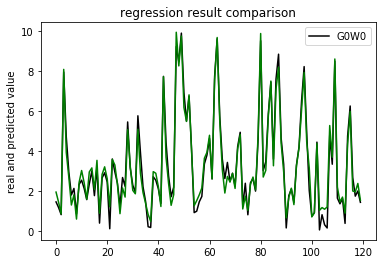

regression prediction


In [53]:
plt.figure()
plt.plot(np.arange(x.shape[0]),y,color='k')
linestyle_list=['-','.','o','v','*']
plt.plot(np.arange(x.shape[0]),pre_y,'g')
plt.title('regression result comparison')
plt.legend(loc='upper right')
plt.ylabel('real and predicted value')
plt.show()

#模型应用
print('regression prediction')

<function matplotlib.pyplot.show>

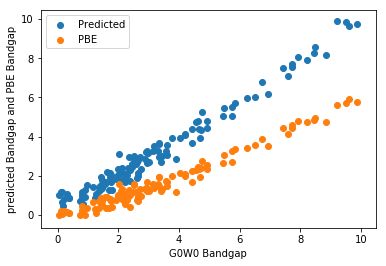

In [54]:
plt.scatter(y,pre_y,label='pred')
plt.scatter(dataset.iloc[:,12],dataset.iloc[:,11],label='PBE')
plt.xlabel('G0W0 Bandgap')
plt.ylabel('predicted Bandgap and PBE Bandgap')
label = ["Predicted", "PBE"]
plt.legend(label, loc = 0)
#plt.savefig('D:\\Workspace\\PyProjects\\points.png')
plt.show

In [55]:
#模型应用
print('regression prediction')
testset = pd.read_csv('testing_MX2.csv')
test_x=testset.iloc[:,1:12]
test_y=testset.iloc[:,12]
pre_y_list=[]
real_y_list=[]
scoreslist=[]
real_y_list.append(test_y)
pred_y=model_lasso.predict(test_x)
pre_y_list.append(pred_y)
scoreslist.append(model_lasso.score(test_x,test_y))


tmp_err=[]
tmp1=[]
for mod in model_metrics_name:
    tmp_err=mod(test_y,pred_y)
    tmp1.append(tmp_err)


print(real_y_list)
print(pre_y_list)
print(scoreslist)
print(tmp1)
#col=['real','predict']
#with open('E:\python\123d.csv','a+') as f:
#dataframe=pd.DataFrame({'real':real_test,'predict_svrr':new_pre_y_list[0],'predict_svrl':new_pre_y_list[1],'predict_rf':new_pre_y_list[2],'predict_ridge':new_pre_y_list[3]})
#dataframe.to_csv(':\\python\\data\\123d.csv',index=True,sep=',',columns=col)


regression prediction
[0     1.230
1     2.826
2     1.868
3     1.618
4     4.412
5     2.871
6     0.936
7     1.256
8     5.816
9     0.493
10    0.046
11    5.249
12    3.338
13    4.268
14    1.421
15    1.090
Name: G0W0, dtype: float64]
[array([1.62446125, 2.3909784 , 1.65444937, 1.51868321, 3.42187169,
       2.11755411, 0.88324774, 1.51527984, 5.60929138, 1.052379  ,
       3.50537417, 5.28111042, 3.15363587, 4.72275403, 1.79872756,
       1.36651105])]
[0.679379681310853]
[0.6905951948242706, 0.5468053461778637, 0.9251385425465275, 0.679379681310853]


<function matplotlib.pyplot.show>

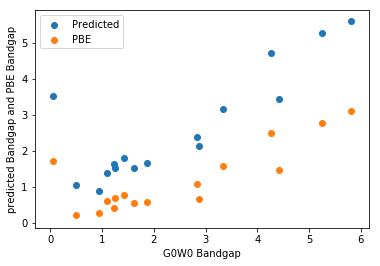

In [48]:
plt.scatter(testset.iloc[:,12],pred_y,label='pred')
plt.scatter(testset.iloc[:,12],testset.iloc[:,11],label='PBE')
plt.xlabel('G0W0 Bandgap')
plt.ylabel('predicted Bandgap and PBE Bandgap')
label = ["Predicted", "PBE"]
plt.legend(label, loc = 0)
#plt.savefig('D:\\Workspace\\PyProjects\\points.png')
plt.show